<a href="https://colab.research.google.com/github/Linafe313/Mini-projects/blob/main/Simple%20Linear%20Regression%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read file


In [23]:
import pandas as pd
import numpy as np

In [24]:
df = pd.read_csv ("/content/countries of the world.csv")

# Sample review

In [25]:
df.head()

,Country,GDP per capita,Population,Area per square mile,Net migration,Infant mortality per 1000 births,Literacy rate,Deathrate
0,Afghanistan,700.0,31056997,647500,23.06,163.07,36.0,20.34
1,Albania,4500.0,3581655,28748,-4.93,21.52,86.5,5.22
2,Algeria,6000.0,32930091,2381740,-0.39,31.00,70.0,4.61
3,American Samoa,8000.0,57794,199,-20.71,9.27,97.0,3.27
4,Andorra,19000.0,71201,468,6.60,4.05,100.0,6.25


# Checking for missing values

In [26]:
#Checking for missing values
missing_data = df.isnull()
missing_data.head(5)

,Country,GDP per capita,Population,Area per square mile,Net migration,Infant mortality per 1000 births,Literacy rate,Deathrate
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [27]:
#Check for missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Country
False    227
Name: Country, dtype: int64

GDP per capita
False    226
True       1
Name: GDP per capita, dtype: int64

Population
False    227
Name: Population, dtype: int64

Area per square mile
False    227
Name: Area per square mile, dtype: int64

Net migration
False    224
True       3
Name: Net migration, dtype: int64

Infant mortality per 1000 births
False    224
True       3
Name: Infant mortality per 1000 births, dtype: int64

Literacy rate
False    209
True      18
Name: Literacy rate, dtype: int64

Deathrate
False    223
True       4
Name: Deathrate, dtype: int64



# Data has missing values, will replace it in pipeline using the mean approach during data preprocessing

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           227 non-null    object 
 1   GDP per capita                    226 non-null    float64
 2   Population                        227 non-null    int64  
 3   Area per square mile              227 non-null    int64  
 4   Net migration                     224 non-null    float64
 5   Infant mortality per 1000 births  224 non-null    float64
 6   Literacy rate                     209 non-null    float64
 7   Deathrate                         223 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 14.3+ KB


# Exploring variables

In [29]:
df.describe()

,GDP per capita,Population,Area per square mile,Net migration,Infant mortality per 1000 births,Literacy rate,Deathrate
count,226.000000,2.270000e+02,2.270000e+02,224.000000,224.000000,209.000000,223.000000
mean,9689.823009,2.874028e+07,5.982270e+05,0.038125,35.506964,82.838278,9.241345
std,10049.138513,1.178913e+08,1.790282e+06,4.889269,35.389899,19.722173,4.990026
min,500.000000,7.026000e+03,2.000000e+00,-20.990000,2.290000,17.600000,2.290000
25%,1900.000000,4.376240e+05,4.647500e+03,-0.927500,8.150000,70.600000,5.910000
50%,5550.000000,4.786994e+06,8.660000e+04,0.000000,21.000000,92.500000,7.840000
75%,15700.000000,1.749777e+07,4.418110e+05,0.997500,55.705000,98.000000,10.605000
max,55100.000000,1.313974e+09,1.707520e+07,23.060000,191.190000,100.000000,29.740000


# Visual exploration of distribution of variables

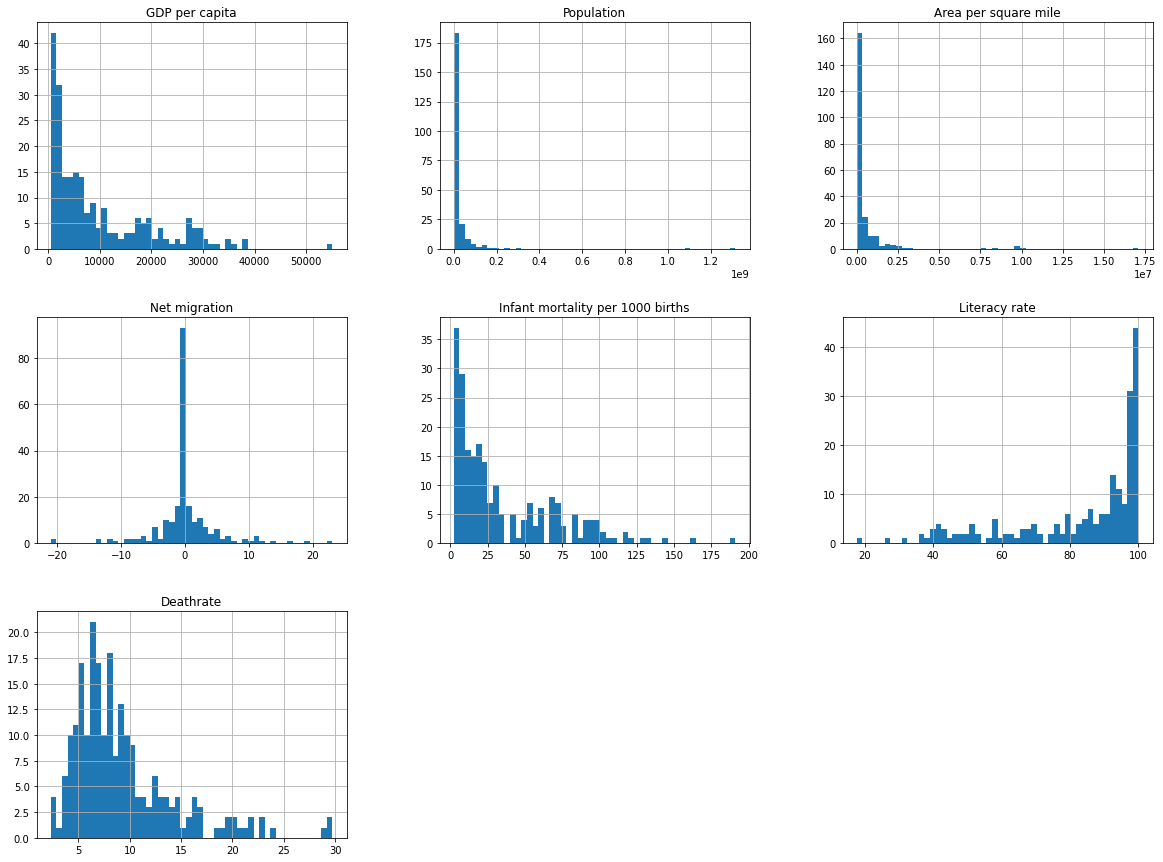

In [30]:
#Visual exploration
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize = (20,15))
plt.show()

# Correlation test

In [31]:
#calling on correlation command
corr_matrix = df.corr()
corr_matrix["GDP per capita"].sort_values(ascending = False)

GDP per capita                      1.000000
Literacy rate                       0.513144
Net migration                       0.382461
Area per square mile                0.072185
Population                         -0.039324
Deathrate                          -0.201661
Infant mortality per 1000 births   -0.600774
Name: GDP per capita, dtype: float64

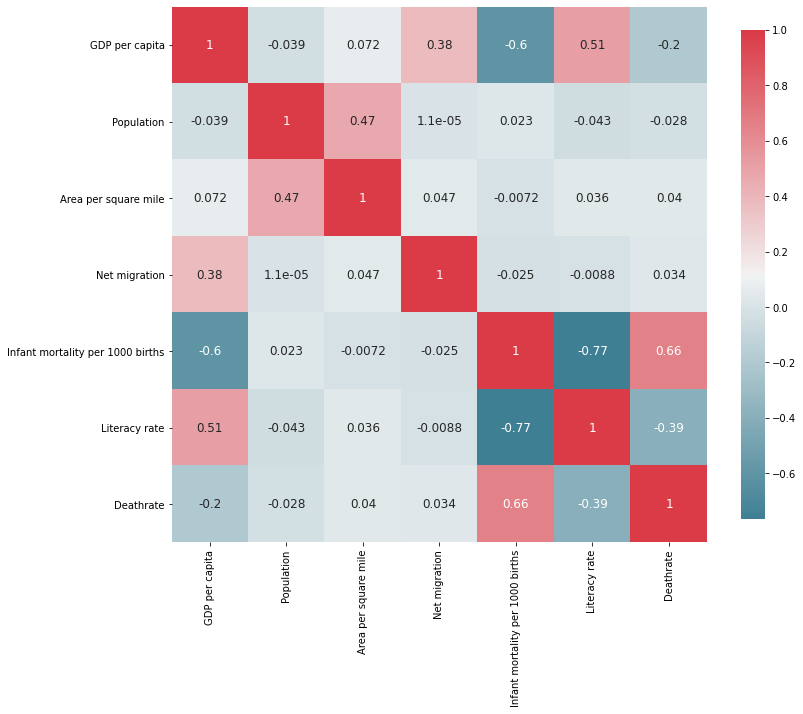

In [32]:
#plotting visual correlation heat map using sns
import seaborn as sns

color_map, ax = plt.subplots (figsize = (12,10))
corr = df.corr(method = 'pearson')
cmap = sns.diverging_palette(220,10, as_cmap = True)
_ = sns.heatmap (corr, cmap = cmap, square = True, cbar_kws={
    'shrink' : .9}, ax=ax, annot = True, annot_kws = {'fontsize':12})

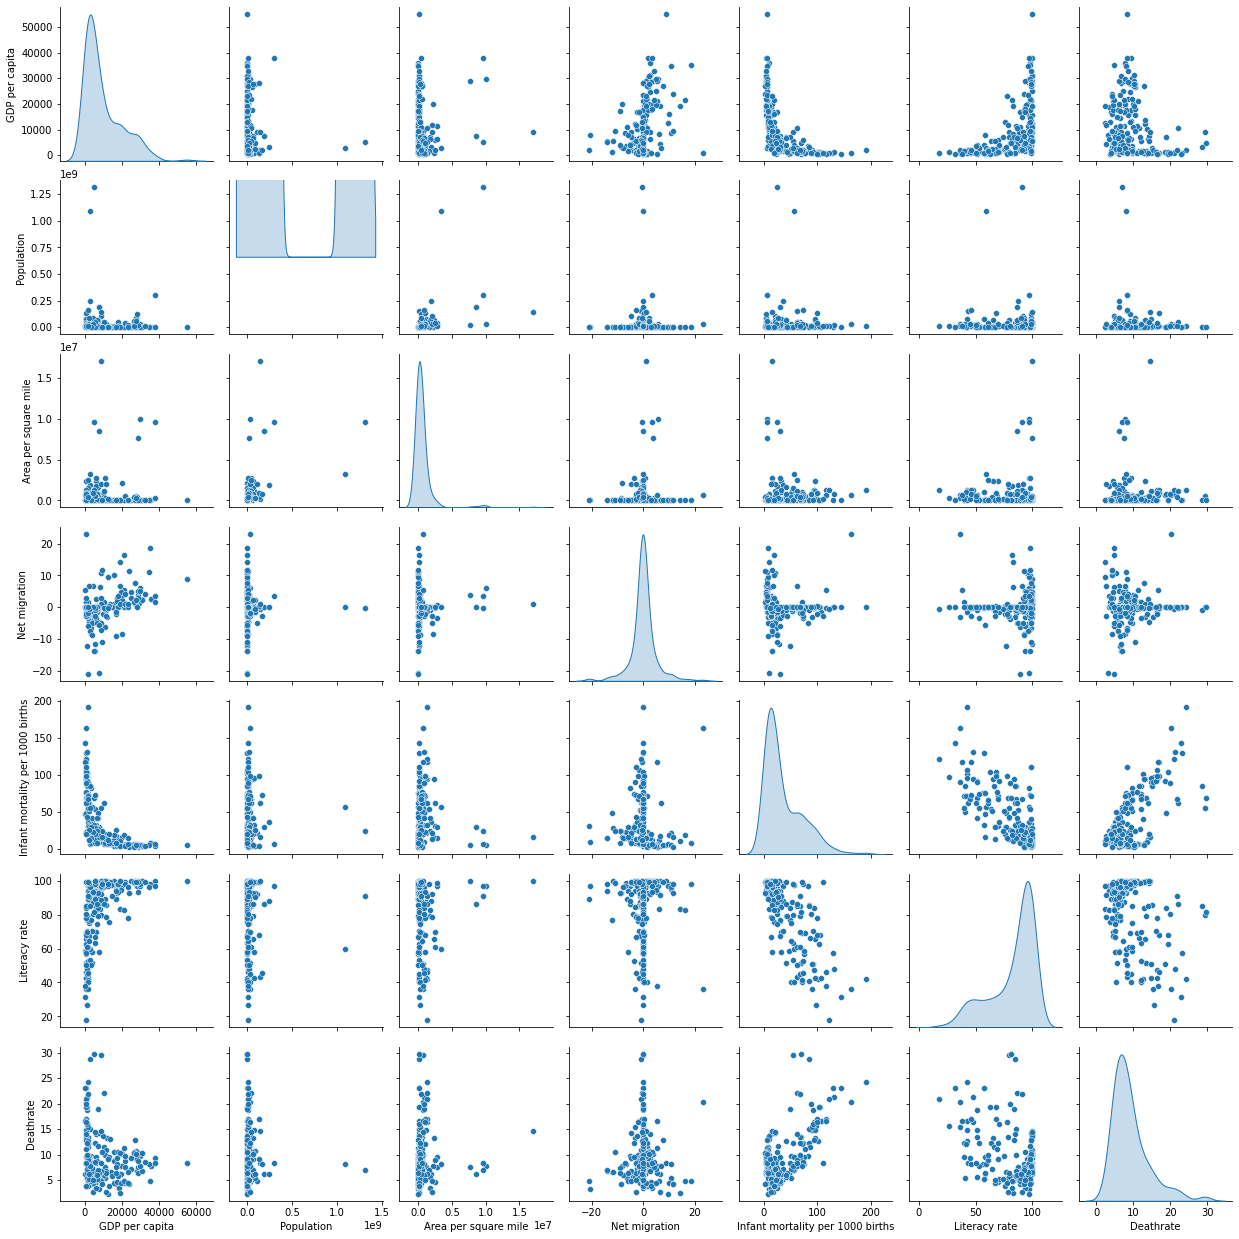

In [33]:
#Pairplot to check further on the correlated variables

sns.pairplot(df, diag_kind="kde")

### Test regression plots of some strong predictors

(0.0, 58988.85273410971)

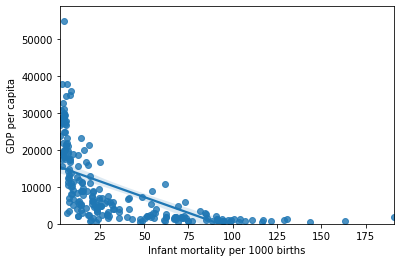

In [34]:
# Year as potential predictor variable of price
sns.regplot(x="Infant mortality per 1000 births", y="GDP per capita", data=df)
plt.ylim(0,)

(0.0, 58378.58582889367)

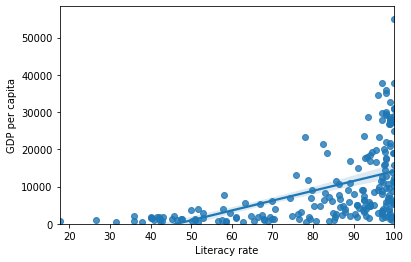

In [36]:
# Year as potential predictor variable of price
sns.regplot(x="Literacy rate", y="GDP per capita", data=df)
plt.ylim(0,)

(0.0, 58610.25501148713)

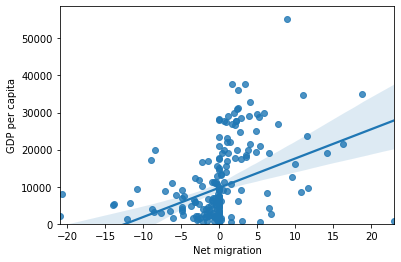

In [37]:
# Year as potential predictor variable of price
sns.regplot(x="Net migration", y="GDP per capita", data=df)
plt.ylim(0,)